## Ex 9.1

In [ ]:
import cv2
save_folder = "do_not_git_push"
vidcap = cv2.VideoCapture('reaction.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
    cv2.imwrite(save_folder+"/frame%d.png" % count, image)
    success,image = vidcap.read()
    count += 1

In [1]:
import matplotlib.pyplot as plt
import skimage.io
import numpy as np

im = skimage.io.imread('do_not_git_push/frame410.png')
plt.imshow(im)
plt.show()

<Figure size 640x480 with 1 Axes>

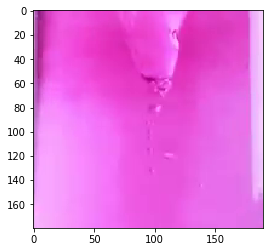

In [2]:
cutim = im[120:300,200:390]
plt.imshow(cutim)
plt.show()

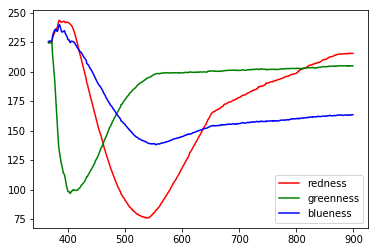

In [3]:
counter = 0
colorarray = np.zeros((3,1000))
xvals = np.zeros(1000)
for i in range(366, 900):
    im = skimage.io.imread('do_not_git_push/frame'+str(i)+'.png')
    cutim = im[120:300,200:390]
    colorarray[0, counter] += np.mean(cutim[:,:,0])
    colorarray[1, counter] += np.mean(cutim[:,:,1])
    colorarray[2, counter] += np.mean(cutim[:,:,2])
    xvals[counter] = i
    counter += 1
    
plt.plot(xvals[:counter],colorarray[0,:counter],'r',label="redness")
plt.plot(xvals[:counter],colorarray[1,:counter],'g',label="greenness")
plt.plot(xvals[:counter],colorarray[2,:counter],'b',label="blueness")
plt.legend()
plt.show()

## Ex 9.2

In [1]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import skimage.io
from skimage.morphology import closing
from skimage.measure import label, regionprops
import numpy as np

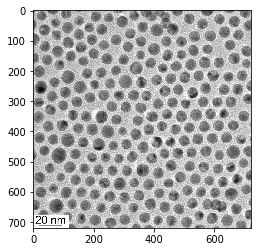

In [6]:
im = skimage.io.imread('data/particles.jpg')
plt.imshow(im)
plt.show()

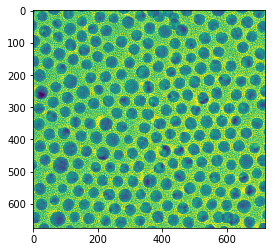

In [7]:
# Taking out the first color dimension. 
im = im[:,:,0]
# And cutting the image to remove the bottom label.
im = im[:675,:]
plt.imshow(im)
plt.show()

In [8]:
# Using a built in algorithm t o find a threshold to distinguish background from particles.
thresh = threshold_otsu(im)

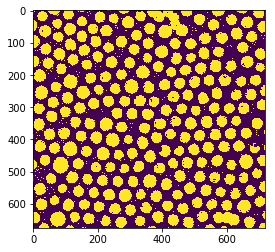

In [9]:
# Using this thresh hold to make a True / False array that indicates background / particles
bw = closing(im < thresh)
plt.imshow(bw)
plt.show()

In [10]:
# Converting to Scikit-Image label object
label_image = label(bw)

Number particles: 241


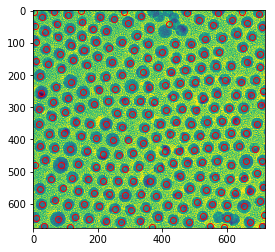

In [19]:
# Using built-in function regionprops to find the particles
counter = 0
plt.imshow(im)
image_regions = regionprops(label_image)
for region in image_regions:
    if region.area > 60:
        counter += 1
        A = region.centroid
        plt.plot(A[1],A[0],'ro', mfc='none')
print("Number particles:",counter)
plt.show()

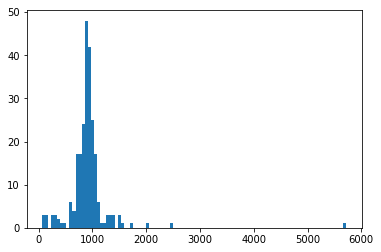

In [20]:
# Using built-in function regionprops to find size of particles
counter = 0
area_array = np.zeros(1000)
image_regions = regionprops(label_image)
for region in image_regions:
    if region.area > 60:
        area_array[counter] = region.area
        counter += 1
plt.hist(area_array[:counter],bins=100)
plt.show()

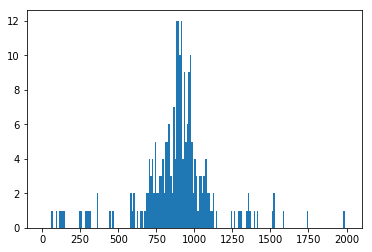

In [18]:
# Making a histogram wihtout the outliers
plt.hist(area_array[:counter],bins=200, range=[0,2000])
plt.show()